In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import io
import scipy.io as sio
%matplotlib inline 
import pylab
import csv
from Tkinter import Tk
from tkFileDialog import askopenfilename
from tkFileDialog import askdirectory
import nibabel as nb
from scipy import io
#from nifti import NiftiImage
import nibabel as nb
from scipy.interpolate import interp1d
from scipy import ndimage

# Open data

In [2]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

In [5]:
Ua=sio.loadmat(filename)
DT=Ua['TSo']
DT.shape

(13494, 298)

In [6]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename2 = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename2)

/media/sophie/008C0665790F0763/ComboPanNeuronalGCaMP6/100026-100027/100026-100027psfKF298Smith0_4_60IC.nii


In [7]:
img1 = nb.load(filename2)
data = img1.get_data()
S=data.shape
S

(90, 55, 9, 298)

In [8]:
S=data.shape
S

(90, 55, 9, 298)

Z-score

In [9]:
Demean=np.zeros(S)
Dmaps=np.zeros(S)
Dvar=np.zeros(S)
Var=np.zeros(S[3])
D2=np.zeros([S[0],S[1],5,S[3]])
Tvar=np.zeros(S[3])

In [10]:
for i in range(S[3]):
    Demean[:,:,:,i]=data[:,:,:,i]-np.mean(np.mean(np.mean(data[:,:,:,i],0),0),0)

In [11]:
for i in range(S[3]):
    Dsq=np.reshape(Demean[:,:,:,i],S[0]*S[1]*S[2])
    Var[i]=np.sqrt(np.var(Dsq))
    Dvar=Demean[:,:,:,i]/Var[i]
    Dmaps[:,:,:,i]=Dvar-2.5
    Tvar[i]=np.var(DT[i,:])
Dmaps[Dmaps<0]=0

# Open Masks

In [17]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenameM = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenameM)
img1 = nb.load(filenameM)
Masks = img1.get_data()
Sm=Masks.shape
Masks=np.array(Masks)

/media/sophie/008C0665790F0763/ComboPanNeuronalGCaMP6/100026-100027/100026_100027Registration/10026JFRCTransformedfullpsftrimmed.nii


In [18]:
filenameM='/home/sophie/RegionList'
with open(filenameM) as f:
    content = f.readlines()
Names=[Line.split('\t') for Line in content]
RegionName=[Names[i][0] for i in range(75)]
Num=[int(Names[i][2]) for i in range(75)]

# Average in masks to sort components by brain region

In [19]:
Dmaps.shape

(90, 55, 9, 298)

In [20]:
M=np.zeros((S[3],86))
Mapmean=np.zeros(S[3])
MMasks=np.zeros(86)

In [21]:
for i in range(S[3]):
    Mapmean[i]=np.mean(np.mean(np.mean(Dmaps[:,:,:,i])))
    for j in range(86):
        MMasks[j]=np.mean(np.mean(np.mean(Masks[:,:,:,j])))
        if MMasks[j]:
            M[i,j]=np.mean(np.mean(np.mean(Masks[:,:,:,j]*Dmaps[:,:,:,i])))/(MMasks[j]*Mapmean[i])

In [22]:
CompMainName=S[3]*['']
CompNameAdd=np.zeros((S[3],86))
for i in range(S[3]):
    Max=np.max(M[i,:])
    I=np.argmax(M[i,:])+1
    for j in range(86):
        J=[l for l in range(74) if Num[l]==(j+1)]
        if M[i,j]>0.2*Max:
            CompNameAdd[i,J]=1
    J=[l for l in range(74) if Num[l]==I]
    if J!= []:
        CompMainName[i]=Names[np.array(J)][0]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


In [23]:
J

[37]

LO_R
AVLP_R
7
LO_R
52
LO_R
PVLP_R
91
LO_R
105
LO_R
ME_R
119
LO_R
LOP_R
IPS_R
145
LO_R
AMMC_R
ATL_R
183
LO_R
EB
ME_R
BU_L
186
LO_R
233
lobula


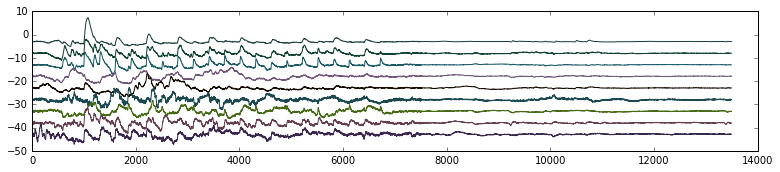

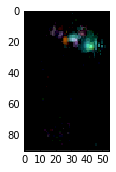

NO
EB
FB
154
nodulus


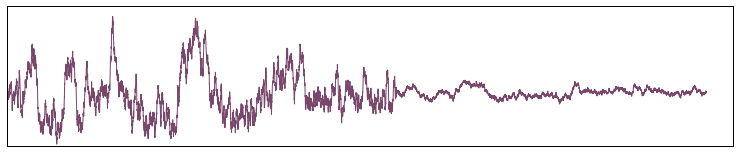

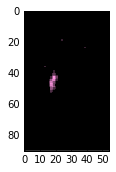

PB
IB_R
IB_L
33
PB
ATL_R
ATL_L
35
PB
ATL_R
ATL_L
44
PB
ATL_R
68
protocerebral bridge


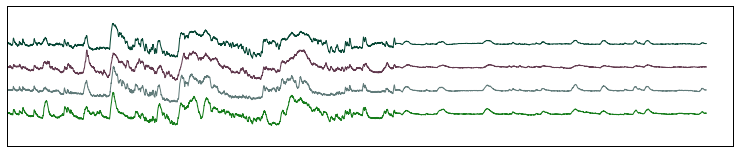

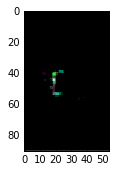

LH_R
SCL_R
192
LH_R
234
LH_R
264
lateral horn


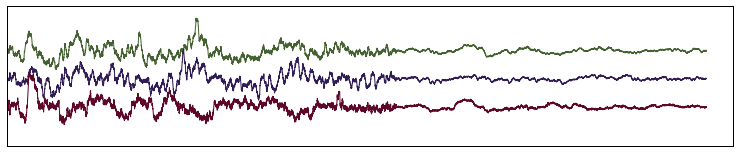

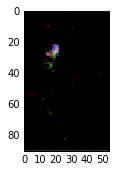

SAD
GNG
IPS_L
55
SAD
AMMC_R
GNG
203
saddle


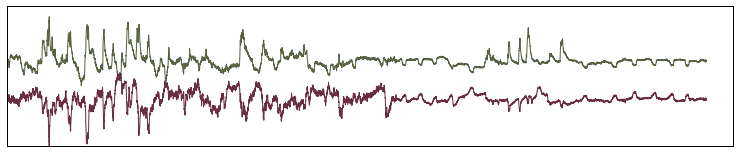

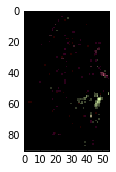

CAN_R
SMP_L
67
CAN_R
FLA_R
102
CAN_R
181
CAN_R
SMP_R
CAN_L
SMP_L
205
CAN_R
276
cantle


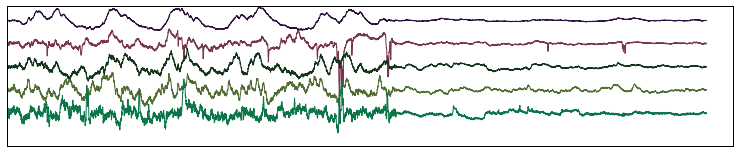

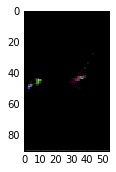

AMMC_R
2
AMMC_R
VES_R
FLA_R
45
AMMC_R
47
SAD
CAN_R
AMMC_R
IPS_R
58
antennal mechanosensory and motor center


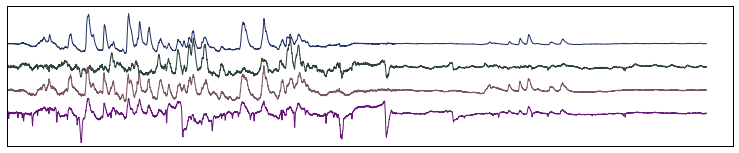

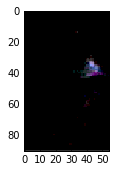

ICL_R
IB_R
MB_PED_R
MB_CA_R
75
inferior clamp


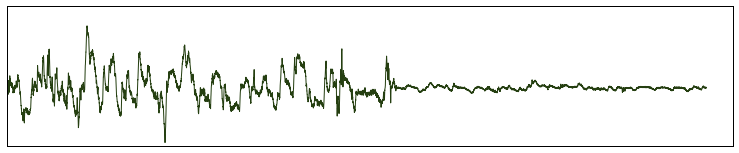

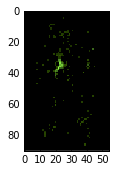

PB
ATL_R
ATL_L
113
antler


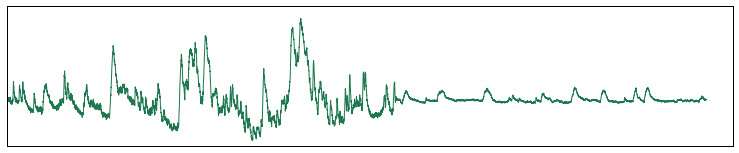

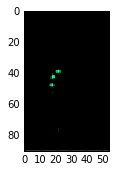

CRE_R
208
CRE_R
235
crepine


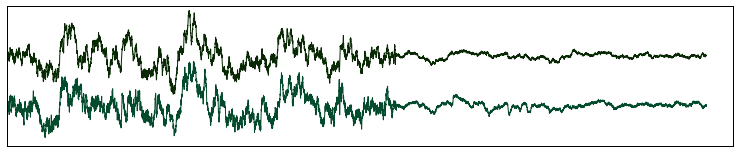

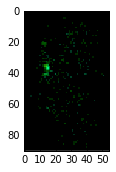

MB_PED_R
MB_VL_R
170
pedunculus of adult mushroom body


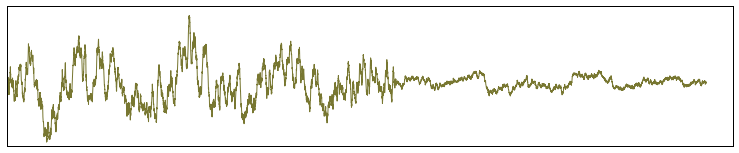

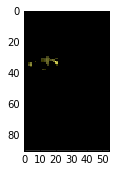

CRE_R
MB_ML_R
130
MB_VL_R
MB_ML_R
135
medial lobe of adult mushroom body


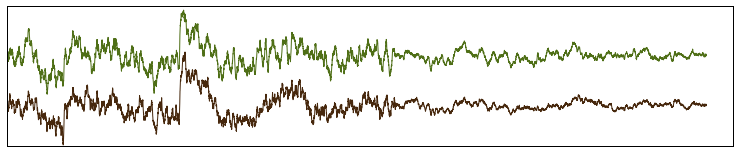

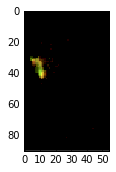

FLA_R
FLA_L
99
flange


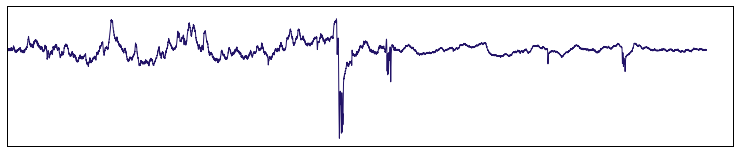

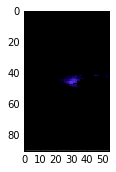

LO_R
LOP_R
10
lobula plate


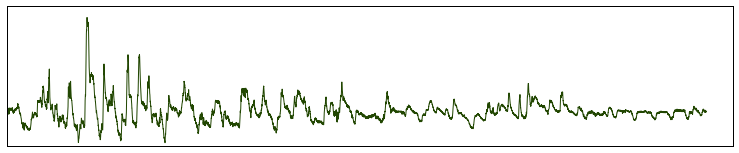

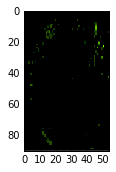

EB
FB
49
EB
AL_L
57
EB
139
MB_VL_R
EB
FB
204
MB_ML_R
EB
CRE_L
MB_ML_L
250
ellipsoid body


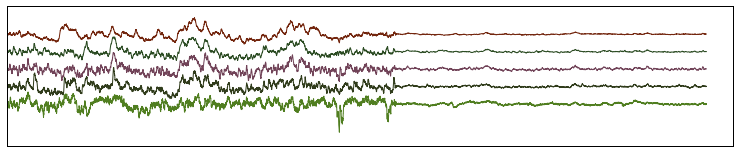

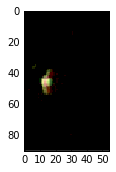

VES_R
AL_R
26
LAL_R
AL_R
51
adult antennal lobe


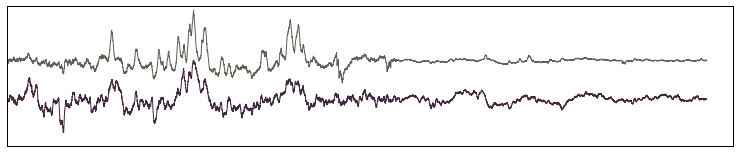

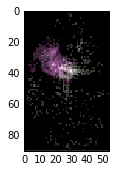

ME_R
5
ME_R
8
ME_R
12
LO_R
ME_R
AVLP_R
13
LO_R
ME_R
14
ME_R
25
ME_R
27
ME_R
34
LO_R
ME_R
37
LO_R
ME_R
50
ME_R
53
LO_R
CAN_R
ME_R
MB_CA_R
65
ME_R
66
ME_R
73
LOP_R
ME_R
79
ME_R
83
LO_R
ME_R
86
ME_R
90
ME_R
93
ME_R
112
ME_R
128
ME_R
136
ME_R
ME_L
137
ME_R
152
LO_R
CAN_R
ME_R
ATL_L
153
ME_R
159
LO_R
PB
ME_R
EPA_R
163
ME_R
175
LO_R
ATL_R
ME_R
PVLP_R
197
LO_R
ME_R
202
ME_R
MB_CA_R
IPS_R
SCL_R
209
medulla


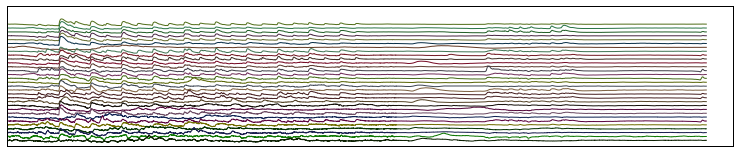

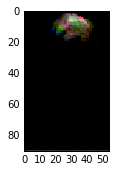

SLP_R
SIP_R
SMP_R
256
superior lateral protocerebrum


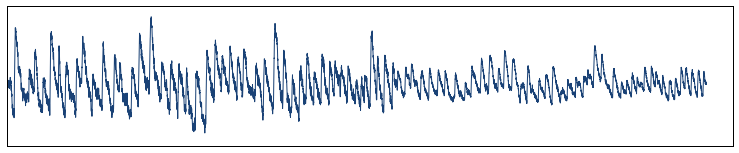

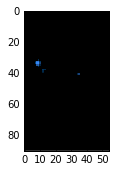

SMP_R
CAN_L
216
SMP_R
252
SLP_R
SMP_R
254
SLP_R
SIP_R
SMP_R
262
CAN_R
SMP_R
278
superior medial protocerebrum


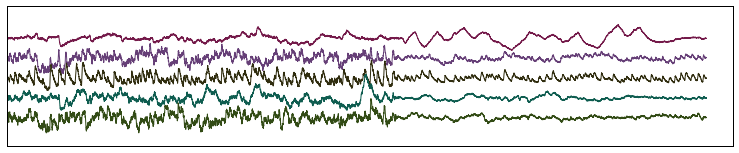

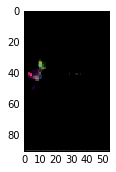

LO_R
AVLP_R
110
AVLP_R
AVLP_L
143
anterior ventrolateral protocerebrum


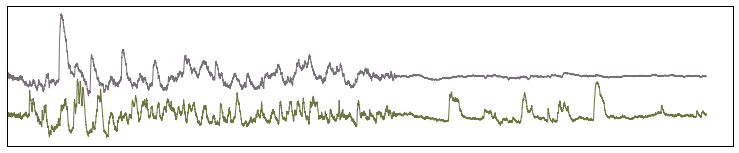

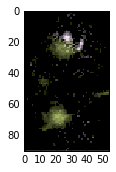

LO_R
PVLP_R
15
AVLP_R
PVLP_R
IVLP_R
24
posterior ventrolateral protocerebrum


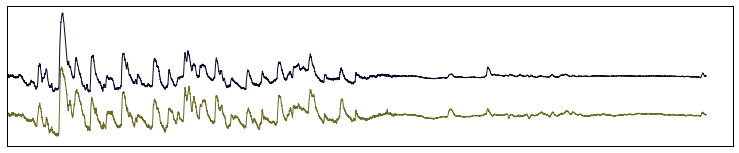

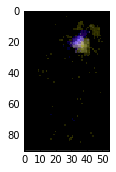

IVLP_R
95
wedge


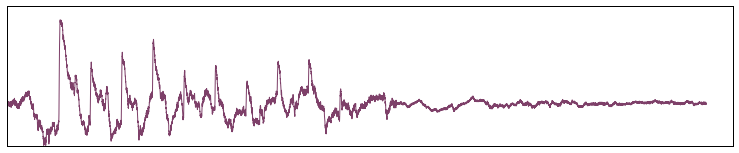

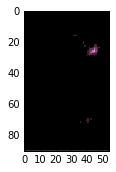

MB_CA_R
187
calyx of adult mushroom body


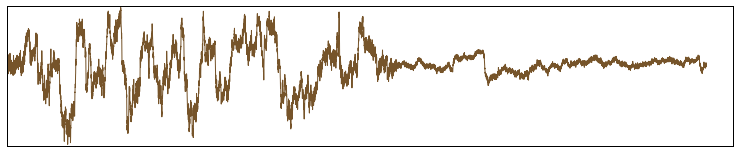

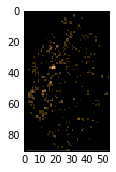

SPS_R
IPS_R
4
VES_R
IB_R
SPS_R
22
VES_R
IVLP_R
SPS_R
210
superior posterior slope


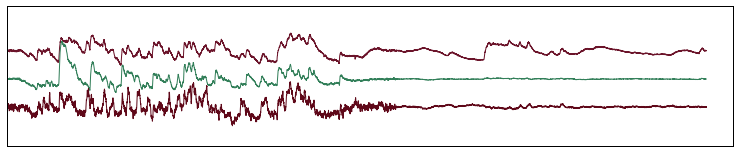

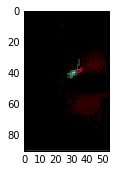

IPS_R
GNG
60
SAD
IPS_R
GNG
70
LO_R
LOP_R
IPS_R
AL_L
100
IPS_R
GNG
109
IPS_R
GNG
115
IVLP_R
PLP_R
SPS_R
IPS_R
121
IPS_R
CAN_L
168
IPS_R
GNG
213
AMMC_R
IVLP_R
IPS_R
220
SAD
CAN_R
IPS_R
223
GOR_R
IPS_R
GNG
247
inferior posterior slope


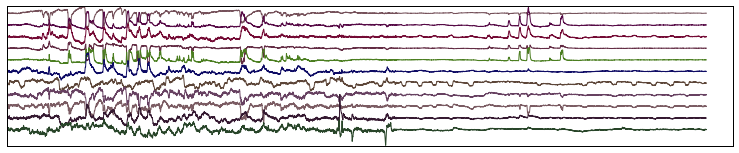

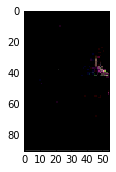

GNG
IVLP_L
IPS_L
77
SAD
GNG
CAN_L
IPS_L
107
adult gnathal ganglion


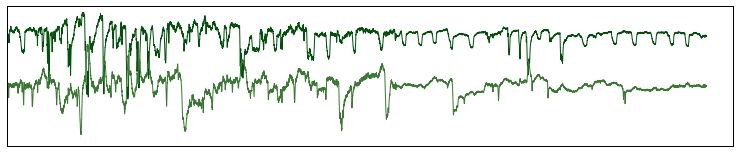

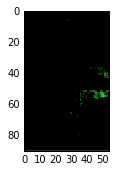

AME_L
20
AME_L
LO_L
36
AME_L
56
AME_L
69
AME_L
LO_L
78
AME_L
LO_L
82
AME_L
88
AME_L
LO_L
127
AME_L
LO_L
LOP_L
138
accessory medulla


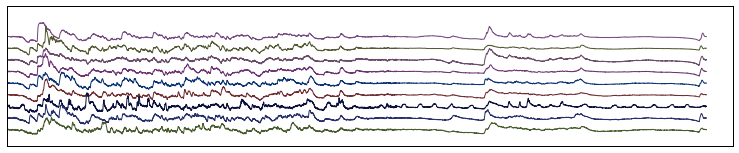

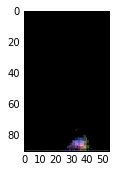

LO_L
ME_L
9
LO_L
16
LO_L
21
LO_L
PVLP_L
23
LO_L
ME_L
40
LO_L
ME_L
43
LO_L
46
LO_L
ME_L
48
LO_L
IPS_L
59
LO_L
ME_L
PVLP_L
61
LO_L
62
CAN_R
LO_L
LOP_L
72
LO_L
76
IB_R
LO_L
85
LO_L
LOP_L
87
LO_L
ME_L
101
LO_L
129
LO_L
131
PB
LO_L
132
LO_L
147
AMMC_R
LO_L
155
LO_L
156
LO_L
171
LO_L
ATL_L
AL_L
PVLP_L
190
PB
LO_L
191
lobula


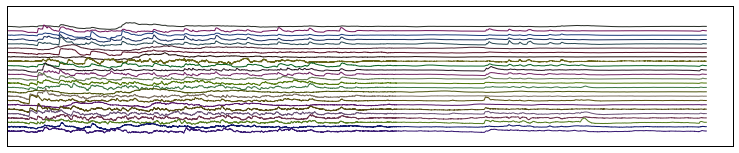

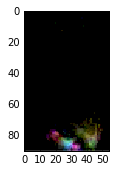

BU_L
CRE_L
142
bulb


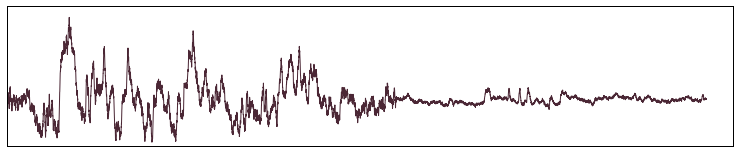

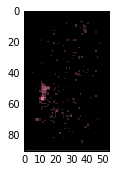

LAL_L
AL_L
41
lateral accessory lobe


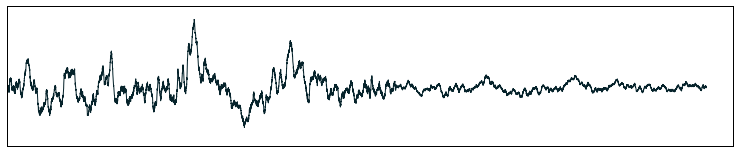

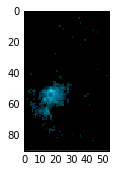

IPS_R
CAN_L
SPS_L
IPS_L
74
CAN_R
CAN_L
106
CAN_L
IPS_L
116
cantle


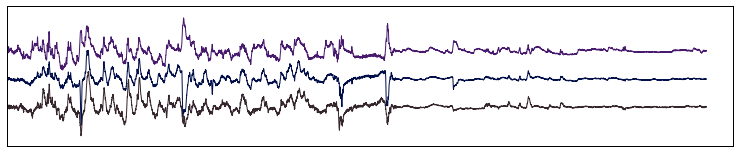

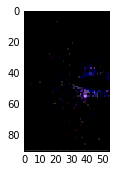

SAD
CAN_L
AMMC_L
FLA_L
29
AMMC_L
38
antennal mechanosensory and motor center


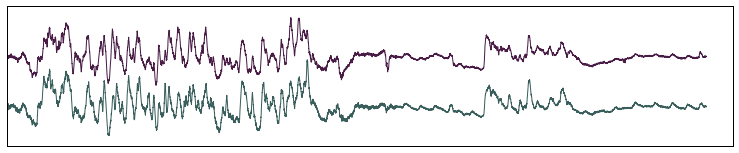

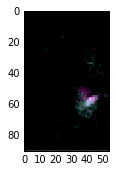

PB
ATL_L
30
ATL_L
125
PB
ICL_L
ATL_L
211
antler


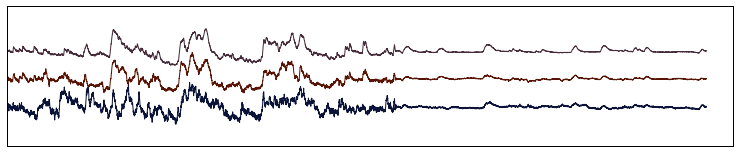

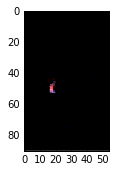

ICL_L
MB_PED_L
MB_VL_L
217
pedunculus of adult mushroom body


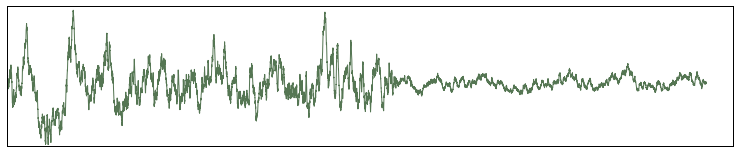

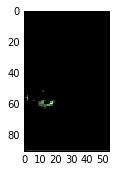

MB_VL_L
SIP_L
SMP_L
PLP_L
231
vertical lobe of adult mushroom body


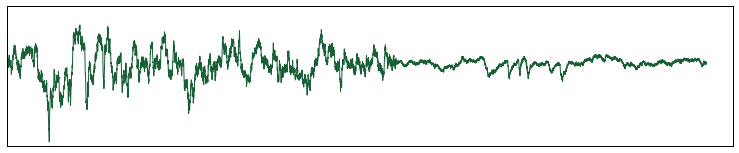

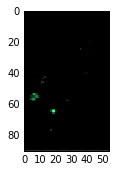

ICL_L
MB_PED_L
MB_ML_L
PLP_L
71
CRE_L
MB_ML_L
173
CRE_L
MB_VL_L
MB_ML_L
184
medial lobe of adult mushroom body


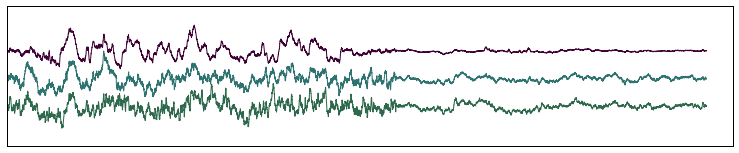

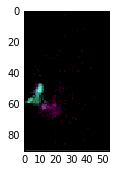

AME_L
LO_L
LOP_L
84
LO_L
ATL_L
LOP_L
98
lobula plate


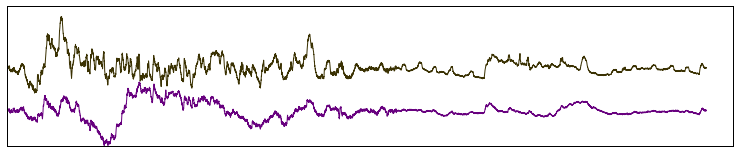

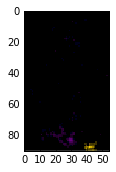

VES_L
FLA_L
AL_L
18
EB
AL_R
AL_L
111
adult antennal lobe


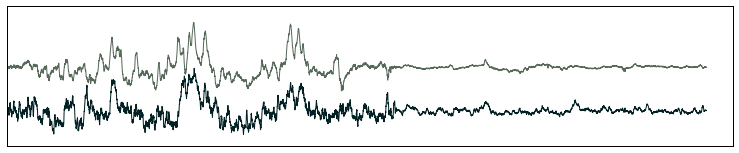

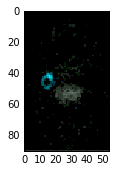

LO_L
ME_L
42
ME_L
118
ME_L
150
medulla


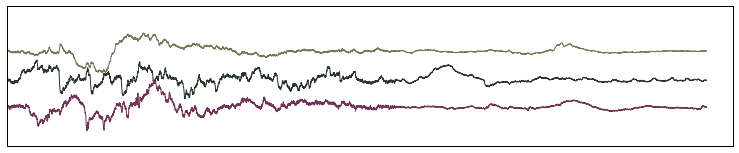

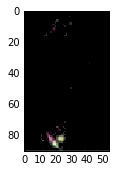

SLP_L
SIP_L
SCL_L
249
superior intermediate protocerebrum


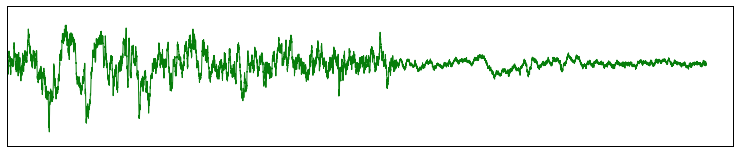

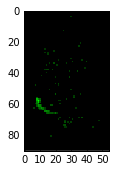

SIP_L
SMP_L
238
MB_VL_L
SMP_L
239
MB_CA_R
CAN_L
SMP_L
243
superior medial protocerebrum


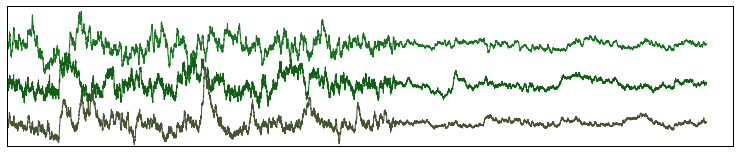

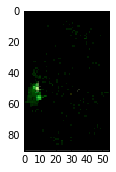

ATL_R
MB_PED_L
AVLP_L
PVLP_L
207
anterior ventrolateral protocerebrum


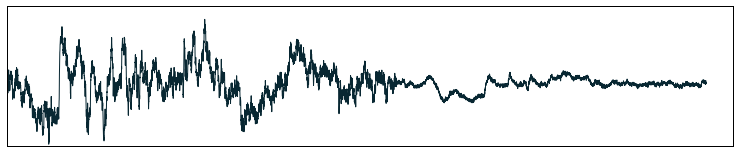

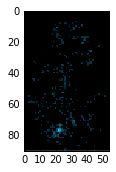

LO_L
AVLP_L
PVLP_L
19
LO_L
PVLP_L
31
LO_L
PVLP_L
63
AVLP_L
PVLP_L
117
AVLP_L
PVLP_L
120
LO_L
PVLP_L
141
posterior ventrolateral protocerebrum


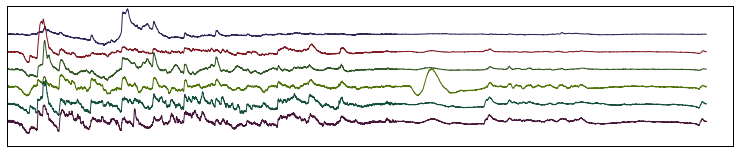

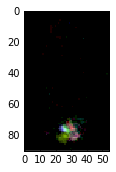

IVLP_L
80
IVLP_L
146
wedge


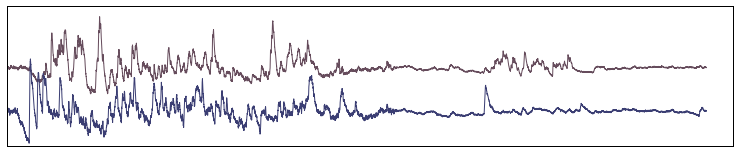

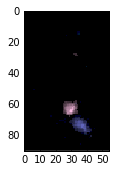

LO_L
PLP_L
0
CAN_R
PLP_L
64
PVLP_L
PLP_L
89
IVLP_L
PLP_L
97
LO_L
PVLP_L
PLP_L
176
posterior lateral protocerebrum


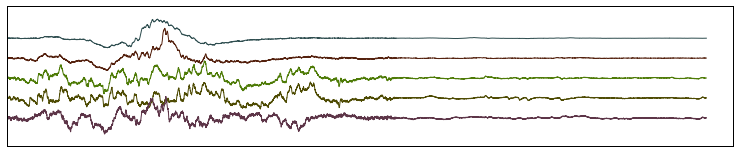

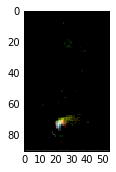

ICL_L
MB_CA_L
196
calyx of adult mushroom body


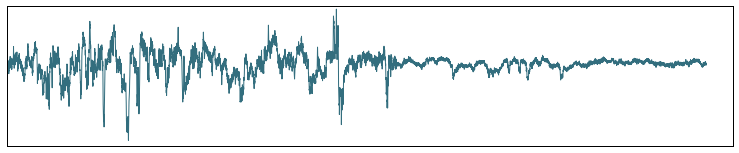

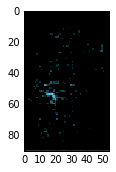

VES_L
IVLP_L
SPS_L
3
VES_L
IB_L
SPS_L
11
VES_L
SPS_L
258
superior posterior slope


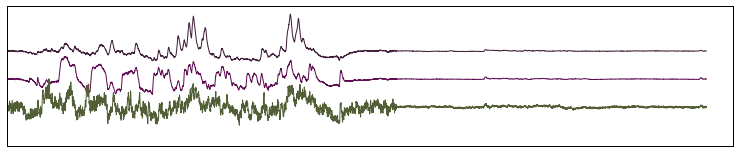

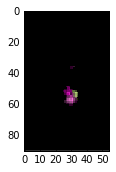

MB_PED_L
IVLP_L
PLP_L
IPS_L
92
SPS_L
IPS_L
144
inferior posterior slope


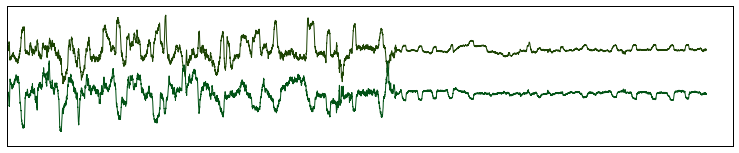

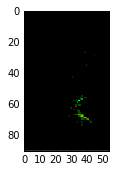

PLP_L
SCL_L
198
CAN_L
SLP_L
SCL_L
263
superior clamp


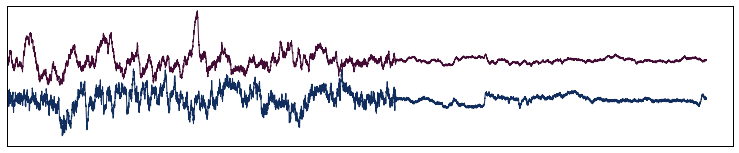

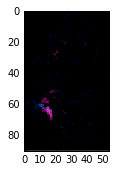

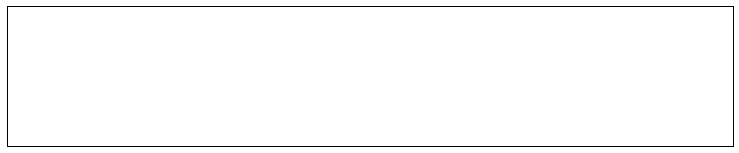

In [24]:
pylab.rcParams['figure.figsize'] = (13, 2.5)

h=5
tot=0
GoodICAnat=np.zeros(S[3])

for l in range(74):
    Final_maps=np.zeros((S[0],S[1],3))
    Fmap=np.zeros((S[0],S[1],3))
    C=np.zeros(3)

    n=0
    for i in range(len(CompMainName)):                    
        Dmmv=np.mean(data[:,:,:,i],2) 
        Dmmv[Dmmv<0.2*np.max(np.max(np.max(Dmmv)))]=0
        C=np.squeeze(np.random.rand(3,1))
        labeled, nrobject=ndimage.label(Dmmv>0)
        
        if CompMainName[i]==Names[l][0] and (sum(CompNameAdd[i,:])<5) and nrobject<200:
            n=n+1            
            
            for k in range(3):
                Fmap[:,:,k]=0.7*Dmmv*C[k]/np.max(C)
            Final_maps=Final_maps+Fmap
            #plt.plot(Time_fluoICA.T,(DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
            plt.plot((DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
            tot=tot+1
            GoodICAnat[i]=1
            #print(i)
            for j in range(86):
                if CompNameAdd[i,j]==1:                
                    print(Names[np.array(j)][0])
            print(i)
            
                    
    if n!=0:
        print(Names[l][1])

        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        FM[FM<0.1]=0
        plt.imshow(FM,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        


##### Looked at the components maps and time series and remove all the components which are localized on the edge of the brain and with activity unlike GCaMP6 transients.


In [34]:
BadICs=[92,99,72,156,216]

In [ ]:
pylab.rcParams['figure.figsize'] = (13, 2.5)

h=5
tot=0
GoodICAnat=np.zeros(S[3])

for l in range(74):
    Final_maps=np.zeros((S[0],S[1],3))
    Fmap=np.zeros((S[0],S[1],3))
    C=np.zeros(3)

    n=0
    for i in range(len(CompMainName)):                    
        Dmmv=np.mean(data[:,:,:,i],2) 
        Dmmv[Dmmv<0.2*np.max(np.max(np.max(Dmmv)))]=0
        C=np.squeeze(np.random.rand(3,1))
        labeled, nrobject=ndimage.label(Dmmv>0)
        
        if CompMainName[i]==Names[l][0] and (sum(CompNameAdd[i,:])<5) and nrobject<200 and BadICs[i]==1:
            n=n+1            
            
            for k in range(3):
                Fmap[:,:,k]=0.7*Dmmv*C[k]/np.max(C)
            Final_maps=Final_maps+Fmap
            #plt.plot(Time_fluoICA.T,(DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
            plt.plot((DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
            tot=tot+1
            GoodICAnat[i]=1
            #print(i)
            for j in range(86):
                if CompNameAdd[i,j]==1:                
                    print(Names[np.array(j)][0])
            print(i)
            
                    
    if n!=0:
        print(Names[l][1])

        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        FM[FM<0.1]=0
        plt.imshow(FM,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        


In [35]:
for idx in BadICs:
    GoodICAnat[idx] = 0.0

# Reorder by larger sub-regions (~ presumed stimulus to motor)

In [25]:
LargerRegionsDic={'':'','AME_R':'OL','LO_R':'OL','NO':'CX','BU_R':'CX','PB':'CX','LH_R':'LH','LAL_R':'LX','SAD':'PENP'
               ,'CAN_R':'PENP','AMMC_R':'PENP','ICL_R':'INP','VES_R':'VMNP','IB_R':'INP','ATL_R':'INP','CRE_R':'INP'
               ,'MB_PED_R':'MB','MB_VL_R':'MB','MB_ML_R':'MB','FLA_R':'PENP','LOP_R':'OL','EB':'CX','AL_R':'AL',
                'ME_R':'OL','FB':'CX','SLP_R':'SNP','SIP_R':'SNP','SMP_R':'SNP','AVLP_R':'VLNP','PVLP_R':'VLNP',
                'IVLP_R':'VLNP','PLP_R':'VLNP','AOTU_R':'VLNP','GOR_R':'VMNP','MB_CA_R':'MB','SPS_R':'VMNP',
                'IPS_R':'VMNP','SCL_R':'INP','EPA_R':'VMNP','GNG':'GNG','PRW':'PENP','GA_R':'LX','AME_L':'OL'
                ,'LO_L':'OL','BU_L':'CX','LH_L':'LH','LAL_L':'LX','CAN_L':'PENP','AMMC_L':'PENP','ICL_L':'INP',
                'VES_L':'VMNP','IB_L':'INP','ATL_L':'INP','CRE_L':'INP','MB_PED_L':'MB','MB_VL_L':'MB',
                'MB_ML_L':'MB','FLA_L':'PENP','LOP_L':'OL','AL_L':'AL','ME_L':'OL','SLP_L':'SNP','SIP_L':'SNP',
                'SMP_L':'SNP','AVLP_L':'VLNP','PVLP_L':'VLNP','IVLP_L':'VLNP','PLP_L':'VLNP','AOTU_L':'VLNP',
                'GOR_L':'VMNP','MB_CA_L':'MB','SPS_L':'VMNP','IPS_L':'VMNP','SCL_L':'INP','EPA_L':'VMNP','GA_L':'LX'}

SmallRegionsSorted=['ME_L','ME_R','LO_R','LO_L','LOP_R','LOP_L','AME_R','AME_L',
                  'PLP_R','PLP_L','PVLP_R','PVLP_L','AVLP_R','AVLP_L','AOTU_R','AOTU_L','IVLP_R','IVLP_L',
                  'AL_R','AL_L',
                  'MB_CA_R','MB_CA_L','MB_PED_R','MB_PED_L','MB_VL_R','MB_VL_L','MB_ML_R','MB_ML_L',
                  'SMP_R','SMP_L','SIP_R','SLP_L','SLP_R','SIP_L',
                  'LH_R','LH_L',                  
                  'CRE_R','CRE_L','ICL_R','ICL_L','SCL_R','SCL_L','IB_R','IB_L','ATL_R','ATL_L',
                  'EB','PB','NO','FB',
                  'BU_R','BU_L','LAL_R','LAL_L','GA_R','GA_L',
                  'GOR_R','GOR_L','EPA_R','EPA_L','VES_R','VES_L','SPS_R','SPS_L','IPS_R','IPS_L',
                  'AMMC_R','AMMC_L','SAD','FLA_R','FLA_L','PRW','CAN_R','CAN_L',
                  'GNG','']

Tozip=range(len(SmallRegionsSorted))
SmallRegionsDic=dict(zip(SmallRegionsSorted,Tozip))

LargerRegion=[LargerRegionsDic[CompMainName[i]] for i in range(S[3])]

LargerRegionInd={ 'OL':1,'VLNP':2,'VMNP':3,'AL':4,'MB':5,'LH':6,'SNP':7,'CX':8,'LX':9,'INP':10,'PENP':11,'GNG':12,'':13}

LargerRegionI=np.array([LargerRegionInd[LargerRegion[i]] for i in range(S[3])])

SmallRegion=np.array([SmallRegionsDic[CompMainName[i]] for i in range(S[3])])

NewOrder=np.argsort(SmallRegion)

SmallRegion[NewOrder]

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  4,  5,  5,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  9,
        9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 13, 13, 16, 16, 17, 17, 18, 18, 19, 19, 20, 21, 21,
       22, 22, 22, 22, 22, 23, 23, 23, 25, 26, 26, 26, 27, 27, 27, 27, 28,
       28, 28, 28, 28, 29, 29, 29, 31, 32, 32, 33, 34, 34, 34, 36, 36, 36,
       38, 38, 38, 38, 40, 40, 40, 41, 41, 41, 42, 42, 44, 44, 44, 44, 45,
       45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 48,
       48, 48, 48, 48, 50, 50, 50, 50, 51, 51, 51, 53, 56, 56, 56, 56, 57,
       57, 57, 57, 58, 58

In [26]:
LargerRegionIndToName = {v: k for k, v in LargerRegionInd.iteritems()}

In [27]:
LargerRegionI

array([ 2,  2, 11,  3,  3,  1,  3,  1,  1,  1,  1,  3,  1,  1,  1,  2,  1,
        1,  4,  2,  1,  1,  3,  1,  2,  1,  4,  1,  3, 11, 10,  2,  2,  8,
        1,  8,  1,  1, 11, 11,  1,  9,  1,  1,  8, 11,  1, 11,  1,  8,  1,
        4,  1,  1,  2, 11,  1,  8, 11,  1,  3,  1,  1,  2,  2,  1,  1, 11,
        8,  1,  3,  5,  1,  1, 11, 10,  1, 12,  1,  1,  2,  1,  1,  1,  1,
        1,  1,  1,  1,  2,  1,  1,  3,  1,  3,  2, 10,  2,  1, 11,  3,  1,
       11, 10,  1,  1, 11, 12,  1,  3,  2,  4,  1, 10,  1,  3, 11,  2,  1,
        1,  2,  3,  3,  8, 11, 10,  1,  1,  1,  1,  5,  1,  1,  3, 10,  5,
        1,  1,  1,  8,  2,  2,  8,  2,  3,  1,  2,  1,  3,  1,  1,  1,  1,
        1,  8,  1,  1, 10,  1,  1, 12, 11,  3,  1,  1,  5, 11,  8,  3,  1,
        5,  1, 10,  5,  1,  1,  2,  5, 10,  2,  1, 11,  2,  1,  5, 10,  1,
        5,  1,  2,  1,  1,  6,  1,  2, 11,  5,  1, 10,  5, 11,  1,  1, 11,
        8, 11, 11,  2, 10,  1,  3, 10, 10,  3,  1,  8,  7,  5, 11,  8,  3,
        1,  3,  3, 10, 10

In [28]:
GoodICAnat

array([ 1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,
        0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0

OL
5
7
8
9
10
12
13
14
16
20
21
23
25
27
34
36
37
40
42
43
46
48
50
52
53
56
59
61
62
65
66
69
72
73
76
78
79
82
83
84
85
86
87
88
90
91
93
98
101
105
112
118
119
127
128
129
131
132
136
137
138
145
147
150
152
153
155
156
159
163
171
175
183
186
190
191
197
202
209
233


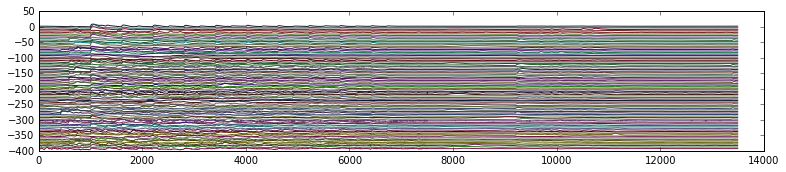

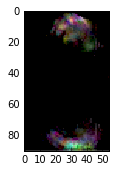

VLNP
0
15
19
24
31
63
64
80
89
95
97
110
117
120
141
143
146
176
207


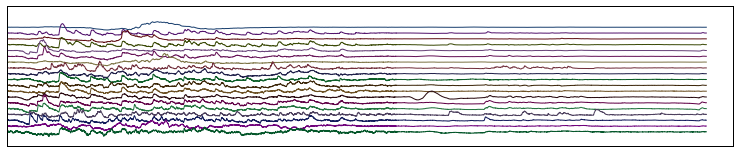

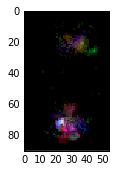

VMNP
3
4
11
22
60
70
92
100
109
115
121
144
168
210
213
220
223
247
258


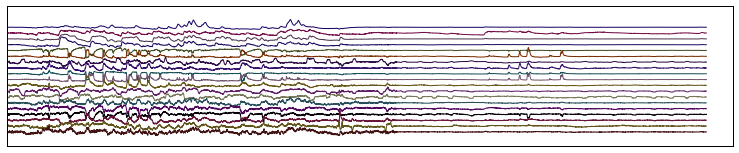

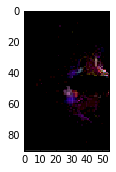

AL
18
26
51
111


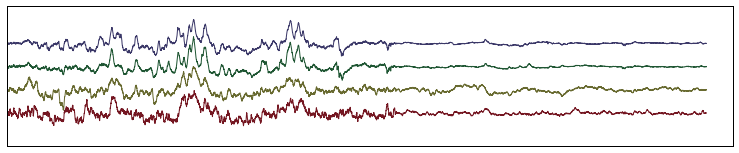

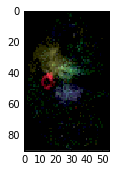

MB
71
130
135
170
173
184
187
196
217
231


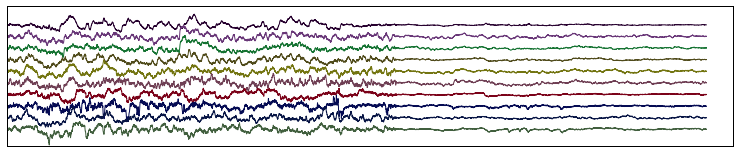

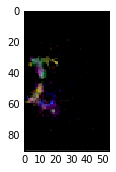

LH
192
234
264


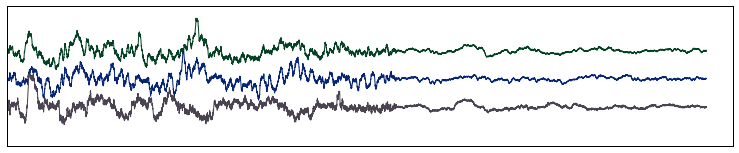

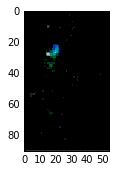

SNP
216
238
239
243
249
252
254
256
262
278


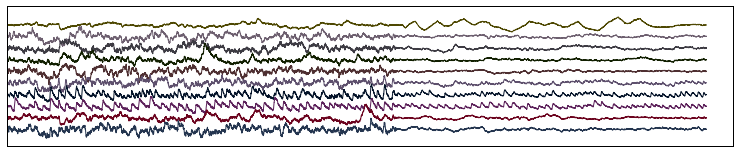

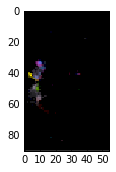

CX
33
35
44
49
57
68
139
142
154
204
250


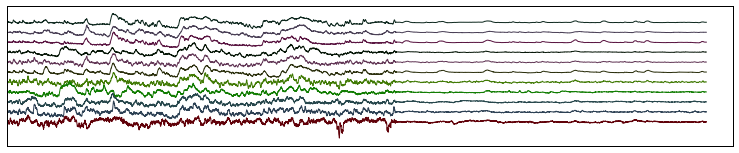

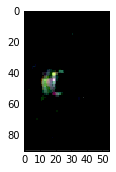

LX
41


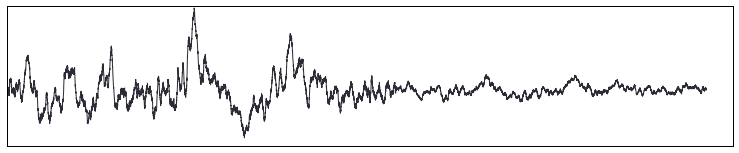

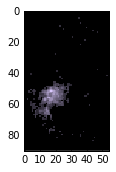

INP
30
75
113
125
198
208
211
235
263


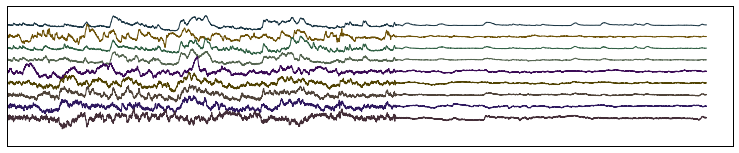

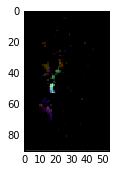

PENP
2
29
38
45
47
55
58
67
74
99
102
106
116
181
203
205
276


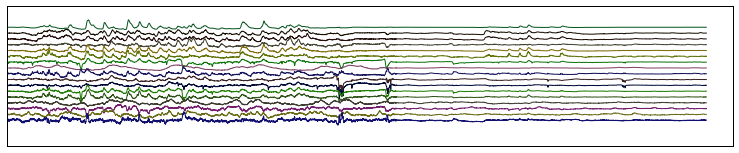

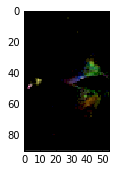

GNG
77
107


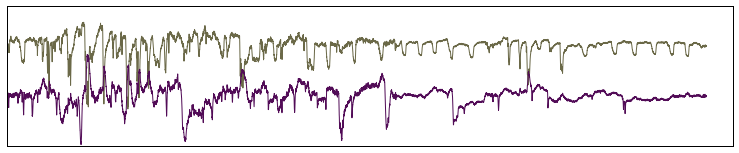

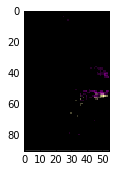

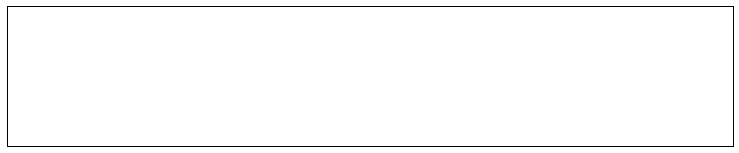

In [29]:
pylab.rcParams['figure.figsize'] = (13, 2.5)

h=5
tot=0
NumberInLargeRegion=np.zeros(13)

for l in range(1,13):
    print(LargerRegionIndToName[l])
    Final_maps=np.zeros((S[0],S[1],3))
    Fmap=np.zeros((S[0],S[1],3))
    C=np.zeros(3)

    n=0
    for i in range(len(CompMainName)):                    
        Dmmv=np.mean(data[:,:,:,i],2) 
        Dmmv[Dmmv<0.2*np.max(np.max(np.max(Dmmv)))]=0
        C=np.squeeze(np.random.rand(3,1))
        labeled, nrobject=ndimage.label(Dmmv>0)
        
        if LargerRegionI[i]==l:          
            if GoodICAnat[i]==1:
                for k in range(3):
                    Fmap[:,:,k]=0.7*Dmmv*C[k]/np.max(C)
                Final_maps=Final_maps+Fmap
                #plt.plot(Time_fluoICA.T,(DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
                plt.plot((DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
                tot=tot+1
                print(i)
                n=n+1 
                    
    if n!=0:

        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        FM[FM<0.1]=0
        plt.imshow(FM,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        
    NumberInLargeRegion[l]=n

In [30]:
# Output number of component per region
np.savetxt('/'.join(filename.split('/')[:-1])+'/NumberInLargeRegions.txt',NumberInLargeRegion)